<div align="center">
      <h1>Introduction to Neural Networks</h1>
      <hr>
      <p>In this Jupyter Notebook, we embark on a journey into the world of neural networks.  Our journey begins with a neural network equipped with two hidden layers, and we'll put it to the test on the intriguing spiral dataset. Through this practical exercise, we aim to demystify the inner workings of neural networks.</p>
    <p>But our exploration doesn't stop there. We'll also dive into the world of activation functions, comparing different ones within this neural architecture. Visualizations will help us understand how these functions impact the data, giving us valuable insights into their roles in shaping neural networks.</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

In [2]:
# Load the dataset, you already know the drill
dataset = np.load('data/datasets/spirals.npz')

X_train, y_train = dataset['X_train'], dataset['y_train']
X_val, y_val = dataset['X_val'], dataset['y_val']
X_test, y_test = dataset['X_test'], dataset['y_test']

## Artificial Neural Network

The concept of neural networks has a rich history, dating back several decades. However, it has recently experienced a surge in popularity, largely driven by advancements in computational power and the accessibility of vast datasets. Artificial Neural Networks, often abbreviated as ANNs, represent a category of models inspired by the intricacies of the human brain.

These networks are comprised of **artificial neurons**, also known as **perceptrons**, intricately interconnected with one another. Each neuron functions as a computational unit, mimicking the way biological neurons process information. It receives inputs, conducts computations, and then forwards the results to subsequent neurons.

### Artificial Neuron

To grasp the foundation of artificial neural networks, it's crucial to understand the fundamental building block: the artificial neuron or perceptron.

<div align="center">
    <img src="data/images/perceptron.png" width="800">
</div>

The artificial neuron functions as a simple linear operation followed by the application of an **activation function**. In this context, we will illustrate using the sigmoid function, denoted as $\sigma$. However, it's important to note that various non-linear functions can be utilized. Essentially, the neuron can be defined as a non-linear mapping:
$$f: \mathbb{R}^{d} \rightarrow \mathbb{R}$$
$$g(\boldsymbol{x}) = \sigma(\boldsymbol{w} \cdot \boldsymbol{x} + b), \quad \boldsymbol{x}, \boldsymbol{w} \in \mathbb{R}^{d},\;\;b \in \mathbb{R}$$

### Activation Functions

A plethora of activation functions are at our disposal. You've likely encountered them before, as you've implemented them in previous assignments. To provide a visual reference, here's an image illustrating these functions:

<div align="center">
    <img src="data/images/activation_functions.png" width="800">
</div>

In this assignment, we'll venture further into the world of activation functions, dissecting and comparing their behaviors.

### Multi-Layer Perceptron

With a firm grasp of neurons and their activation functions, we're now equipped to delve into the intriguing realm of neural networks. Our starting point? The simplest form of a neural network - the **Multi-Layer Perceptron (MLP)**, also known as the **Fully Connected Neural Network**.

<div align="center">
    <img src="data/images/mlp.png" width="800">
</div>

Multilayer Perceptron (MLP), as the name suggests, consists of multiple layers of artificial neurons. Each set of artificial neurons that operate on the same input data is collectively referred to as a **layer**. This naming convention reflects the network's hierarchical structure.

The term 'fully connected neural network' is also synonymous with MLP, and it hints at the interconnected nature of these neurons. In this architecture, each neuron in a given layer is connected to every neuron in the preceding and subsequent layers. This dense interconnection allows for the propagation of information throughout the network, enabling it to learn intricate patterns and relationships within the data.

To visualize this concept in terms of vectorized operations, you can think of an MLP as a series of matrix multiplications and activation functions applied to the input data as it flows through the layers. This matrix-based representation is not only computationally efficient but also provides a deeper understanding of how information is processed within the network.

<div align="center">
    <img src="data/images/mlp_vectorized.png" width="800">
</div>

On the image, we observe a neural network comprising two hidden layers, which adds complexity to the model's structure. This complexity can also be described mathematically through a series of transformations:

1. **First Hidden Layer:** The output of the first hidden layer, denoted as $\boldsymbol{g}_1(\boldsymbol{x})$, is calculated as follows:
$$\boldsymbol{g}_1(\boldsymbol{x}) = \boldsymbol{\sigma}(\boldsymbol{W}^{(1)} \cdot \boldsymbol{x} + \boldsymbol{b}^{(1)})$$
Where the $\boldsymbol{W}^{(1)}$ is the weight matrix of dimensions $\mathbb{R}^{h_1 \times d}$ and the $\boldsymbol{b}^{(1)}$ is the bias vector of dimensions $\mathbb{R}^{h_1}$

2. **Second Hidden Layer:** Likewise, the output of the second hidden layer, $\boldsymbol{g}_2(\boldsymbol{x})$, is computed as:
$$\boldsymbol{g}_2(\boldsymbol{x}) = \boldsymbol{\sigma}(\boldsymbol{W}^{(2)} \cdot \boldsymbol{x} + \boldsymbol{b}^{(2)})$$ 
Where the $\boldsymbol{W}^{(2)}$ is the weight matrix of dimensions $\mathbb{R}^{h_2 \times h_1}$ and the $\boldsymbol{b}^{(2)}$ is the bias vector of dimensions $\mathbb{R}^{h_2}$

3. **Output Layer:** Finally, the output of the network, $\boldsymbol{y}$, is calculated as:
$$\boldsymbol{g}_3(\boldsymbol{x}) = \boldsymbol{W}^{(3)} \cdot \boldsymbol{x} + \boldsymbol{b}^{(3)}$$
Where the $\boldsymbol{W}^{(3)}$ is the weight matrix of dimensions $\mathbb{R}^{c \times h_2}$ and the $\boldsymbol{b}^{(3)}$ is the bias vector of dimensions $\mathbb{R}^{c}$

In this mathematical notation, each hidden layer transforms the input, resulting in an increasingly abstract representation of the data. This leads us to the **forward pass** of the neural network with two hidden layers, described as:

$$\boldsymbol{f}(\boldsymbol{x}) = \boldsymbol{g}_3(\boldsymbol{g}_2(\boldsymbol{g}_1(\boldsymbol{x}))) = \boldsymbol{y}, \quad \boldsymbol{x} \in \mathbb{R}^{d},\; \boldsymbol{y} \in \mathbb{R}^{c}$$

It's worth noting that $\boldsymbol{y}$ is referred to as the score vector in this context, following a common convention in the literature. This notation allows us to clearly express the network's output without ambiguity regarding whether it signifies scores or class labels.

In [3]:
import pickle
#from utils.visualizer import Visualizer

#visualizer = Visualizer((X_train, y_train), (X_val, y_val), (X_test, y_test))

input_size = X_train.shape[1]
hidden_dim_1 = 100
hidden_dim_2 = 2
num_classes = len(np.unique(y_train))

## Training the Neural Network

Now that we've covered the theory behind the MLPs, it's time to implement one. Please proceed to the `assignments/mlp_classifier.py` file and complete the `MLPClassifier` class. Once you've done that, return to this notebook and run the following cells to train and evaluate your model.

### ReLU Activation Function

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Training: 100%|██████████| 10000/10000 [04:10<00:00, 39.90it/s]


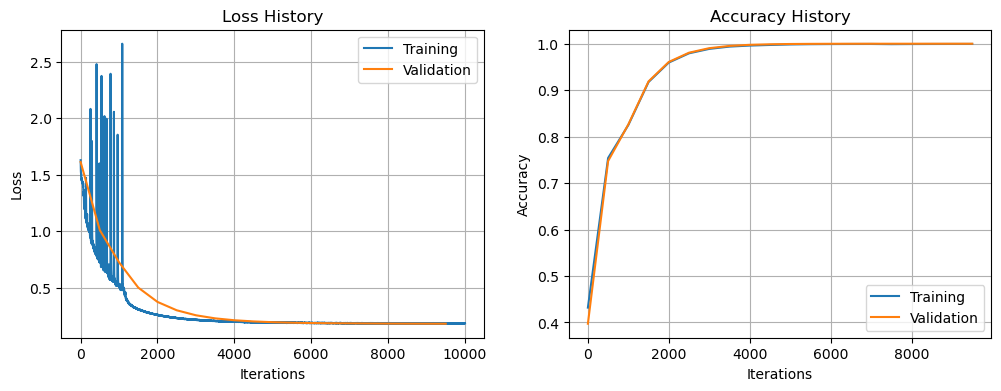

In [7]:
import time
from sklearn.metrics import accuracy_score

from utils.general import plot_nn_training
from assignments.mlp_classifier import MLPClassifier

np.random.seed(69)

# Train the MLP with ReLU activation function
mlp_relu = MLPClassifier(input_size, hidden_dim_1, hidden_dim_2, num_classes, weight_scale=1, reg=1e-3,
                         learning_rate=2e-1, batch_size=1000, num_iters=10000, verbose=True)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_nn_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)
#visualizer.show_decision_boundaries(mlp_relu, h=0.01)

time.sleep(3)

# Evaluate the MLP with ReLU activation function
y_pred = mlp_relu.predict(X_val)
acc = accuracy_score(y_val, y_pred)
user_input = input(f"Would you like to save the model that achieved {acc * 100:.2f}% accuracy\n"
                   f"on the validation set using the ReLU activation function? (y/n)")

if user_input.lower() == 'y':
    with open("data/models/spirals_relu.pkl", "wb") as f:
        pickle.dump(mlp_relu, f)

In [ ]:
visualizer.show_decision_functions(mlp_relu, 'mlp')

### Hyperbolic Tangent Activation Function

Training:   0%|          | 0/20000 [00:00<?, ?it/s]

Training: 100%|██████████| 20000/20000 [01:50<00:00, 181.32it/s]


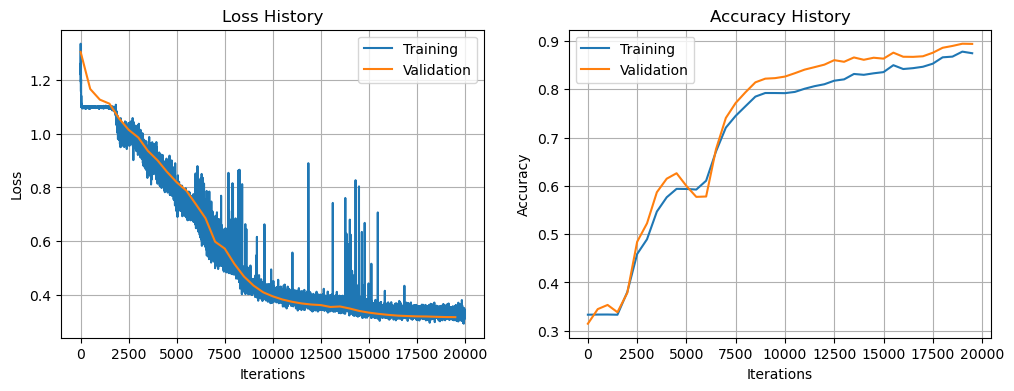

In [9]:
import time
from sklearn.metrics import accuracy_score

from utils.general import plot_nn_training
from assignments.mlp_classifier import MLPClassifier

np.random.seed(69)

# Train the MLP with Hyperbolic Tangent as an activation function
mlp_tanh = MLPClassifier(input_size, hidden_dim_1, hidden_dim_2, num_classes, weight_scale=0.01, reg=0,
                         learning_rate=1e-1, batch_size=100, num_iters=20000, verbose=True, activation='tanh')
tanh_loss_history, tanh_acc_history = mlp_tanh.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_nn_training(tanh_loss_history, tanh_acc_history, ema=True, alpha=0.5)
#visualizer.show_decision_boundaries(mlp_tanh, h=0.01)

time.sleep(3)

# Evaluate the MLP with ReLU activation function
y_pred = mlp_tanh.predict(X_val)
tanh_acc = accuracy_score(y_val, y_pred)
user_input = input(f"Would you like to save the model that achieved {tanh_acc * 100:.2f}% accuracy\n"
                   f"on the validation set using the Tanh activation function? (y/n)")

if user_input.lower() == 'y':
    with open("data/models/spirals_tanh.pkl", "wb") as f:
        pickle.dump(mlp_tanh, f)

In [ ]:
visualizer.show_decision_functions(mlp_tanh, 'mlp')

### Sigmoid Activation Function

Training:   0%|          | 0/20000 [00:00<?, ?it/s]

Training: 100%|██████████| 20000/20000 [01:35<00:00, 210.12it/s] 


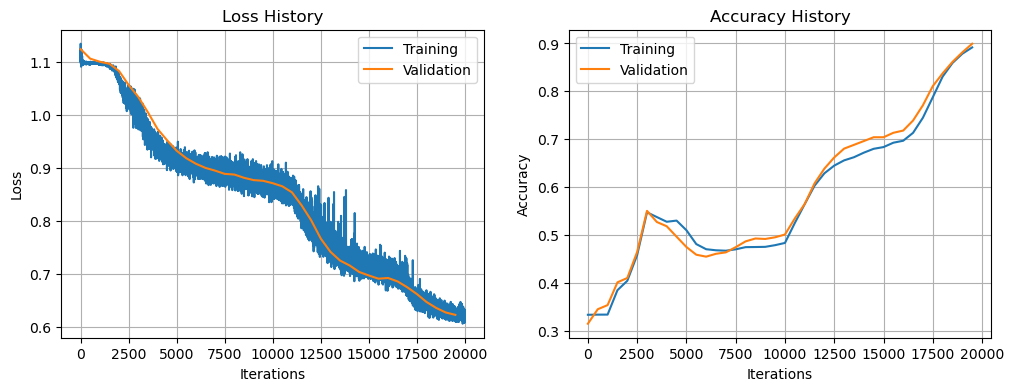

In [10]:
import time
from sklearn.metrics import accuracy_score

from utils.general import plot_nn_training
from assignments.mlp_classifier import MLPClassifier

np.random.seed(69)

# Train the MLP with Hyperbolic Tangent as an activation function
mlp_sigmoid = MLPClassifier(input_size, hidden_dim_1, hidden_dim_2, num_classes, weight_scale=0.1, reg=1e-6,
                            learning_rate=5e-1, batch_size=100, num_iters=20000, verbose=True, activation='sigmoid')
sigmoid_loss_history, sigmoid_acc_history = mlp_sigmoid.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_nn_training(sigmoid_loss_history, sigmoid_acc_history, ema=True, alpha=0.5)
#visualizer.show_decision_boundaries(mlp_sigmoid, h=0.01)

time.sleep(3)

# Evaluate the MLP with ReLU activation function
y_pred = mlp_sigmoid.predict(X_val)
sigmoid_acc = accuracy_score(y_val, y_pred)
user_input = input(f"Would you like to save the model that achieved {sigmoid_acc * 100:.2f}% accuracy\n"
                   f"on the validation set using the Tanh activation function? (y/n)")

if user_input.lower() == 'y':
    with open("data/models/spirals_sigmoid.pkl", "wb") as f:
        pickle.dump(mlp_sigmoid, f)

In [ ]:
visualizer.show_decision_functions(mlp_sigmoid, 'mlp')